## 3. Data Analysis: Search for Patterns
    

##### The code in this notebook analyzes the corpus and provides answers to some of the research questions in the proposal.

### Preparation: load all the tweets in a big list

In [1]:
# import packages

import os
import json
import matplotlib.pyplot as plt

# define a function that creates the path of the file based on the input keyword

def get_file_name (keyword):
    folder_name = '/Users/qiuzhuang/Desktop/final_project_psc290/data/raw/'
    file_type = '.json'
    return folder_name+keyword+file_type

# define a function that counts the number of tweets in the file

def get_number_of_tweets(filename):  
    tweets = []
    for line in open(filename, 'r'):
        tweets.append(json.loads(line))
    return len(tweets)

# define a variable that holds keywords

keyword_list = ['definitely','might','must','would','possibly','probably','certainly','may']

In [2]:
# define an empty list called 'superlist', which will store all the tweets from the json files
superlist=[]
# for each of the json file, load the tweets in a list
for keyword in keyword_list:
    tweets = []
    file_name = get_file_name(keyword)
    for line in open(file_name, 'r'):
        tweets.append(json.loads(line))
# store the tweets in the superlist
    for item in tweets:
        item=item['text']
        superlist.append(item)
    print("Tweets in '",keyword+'.json',"' have been loaded.")
print ('Loading completed. Superlist is ready to use!')

Tweets in ' definitely.json ' have been loaded.
Tweets in ' might.json ' have been loaded.
Tweets in ' must.json ' have been loaded.
Tweets in ' would.json ' have been loaded.
Tweets in ' possibly.json ' have been loaded.
Tweets in ' probably.json ' have been loaded.
Tweets in ' certainly.json ' have been loaded.
Tweets in ' may.json ' have been loaded.
Loading completed. Superlist is ready to use!


### Preparation: define lists of patterns that will be searched in the corpus

In [3]:
# define two lists of keywords based on the part of speech, which will be used to generate different combination patterns.

Adverb =['certainly','definitely','possibly','probably']
Auxiliary=['may','might','must','would']

# this list stores all possible combinations of adverb and auxiliary pairs
pattern_list=[]

# this list stores 'adverb auxiliary' pairs
adv_aux_list=[]

# this list stores 'auxiliary adverb' pairs
aux_adv_list=[]
for adv in Adverb:
    for aux in Auxiliary:      
        adv_aux = adv+' '+aux
        aux_adv = aux+' '+adv
        pattern_list.append(adv_aux)
        pattern_list.append(aux_adv)
        adv_aux_list.append (adv_aux)
        aux_adv_list.append(aux_adv)
print ('pattern_list:\n',pattern_list,'\n','adv_aux_list:\n',
       adv_aux_list,'\n','aux_adv_list:\n',aux_adv_list)

pattern_list:
 ['certainly may', 'may certainly', 'certainly might', 'might certainly', 'certainly must', 'must certainly', 'certainly would', 'would certainly', 'definitely may', 'may definitely', 'definitely might', 'might definitely', 'definitely must', 'must definitely', 'definitely would', 'would definitely', 'possibly may', 'may possibly', 'possibly might', 'might possibly', 'possibly must', 'must possibly', 'possibly would', 'would possibly', 'probably may', 'may probably', 'probably might', 'might probably', 'probably must', 'must probably', 'probably would', 'would probably'] 
 adv_aux_list:
 ['certainly may', 'certainly might', 'certainly must', 'certainly would', 'definitely may', 'definitely might', 'definitely must', 'definitely would', 'possibly may', 'possibly might', 'possibly must', 'possibly would', 'probably may', 'probably might', 'probably must', 'probably would'] 
 aux_adv_list:
 ['may certainly', 'might certainly', 'must certainly', 'would certainly', 'may defini

### Research Question 1: How many different types of nested epistemic modals exist in English?

In [4]:
# define a function that matches a list of patterns in a list of texts
def search_pattern(my_list,my_pattern):
# delete repeated items in the list
    my_list = set (my_list)
# define a dictionary, which will store the pattern and its frequency
    pattern_summary={}
    for pattern in my_pattern:
        matching = [s for s in my_list if pattern in s.lower()]     
        pattern_summary.update({pattern: len(matching)})
    return pattern_summary

In [6]:
# search for all possible combinations of adverb and auxiliary pairs in the superlist
mypattern = search_pattern (superlist,pattern_list)

In [7]:
# define a function that plot the pattern_summary dictionary using a bar plot. 
def patten_summary_plot(pattern_summary,title_string):
    label= list(pattern_summary.keys())
    frequency= list(pattern_summary.values())
    fig,ax= plt.subplots(figsize=(25,5))
    ax.bar(label,frequency)
    ax.set_xticklabels(label,rotation=90, size=15)
    plt.grid(color='grey', linestyle='-',axis='y', linewidth=0.9)
    plt.ylabel('frequency',size=15)
    plt.title(title_string,size= 18)   

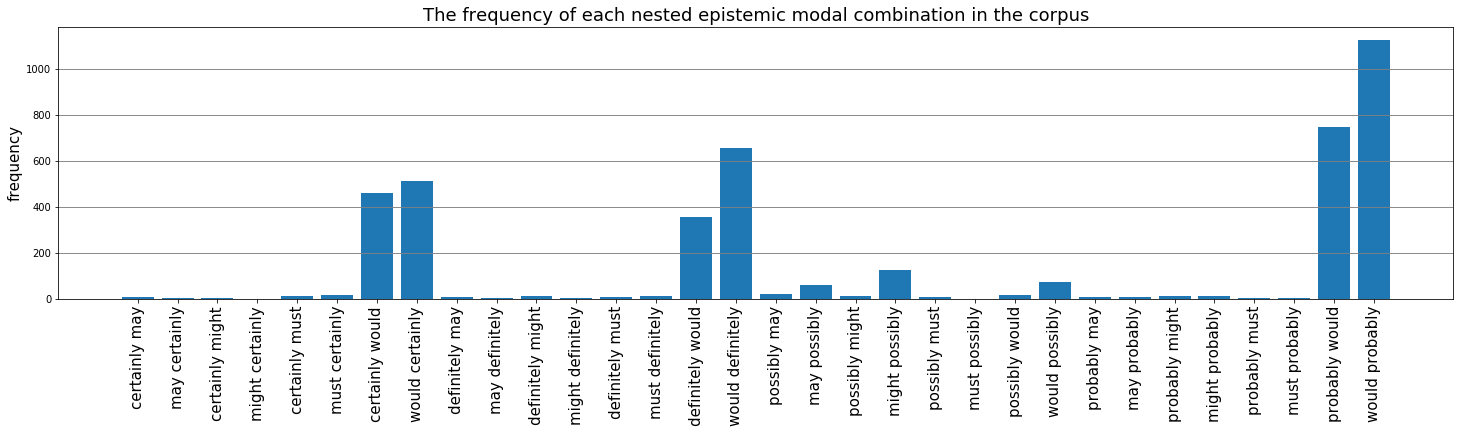

In [8]:
# plot the frequency of all possible combinations of adverb and auxiliary pairs
patten_summary_plot(mypattern,'The frequency of each nested epistemic modal combination in the corpus')
# Save the plot
plt.savefig('frequency_plot_for_all_patterns.png',bbox_inches='tight')

##### The nested modal combinations that contain the word 'would' are way more frequent than the other modal combinations.
##### The next step is to take a look at the tweets that contain those modal combinations and see what is going on.

In [9]:
# write a function that search and print matched tweets
def print_pattern(my_list,my_pattern,number_of_print):
    my_list = set (my_list)
    for pattern in my_pattern:
        matching = [s for s in my_list if pattern in s.lower()]
        print_list= matching[0:number_of_print]
        if number_of_print<= len(matching):            
            print (number_of_print,'tweets that contain "',pattern,'":\n')
            for tweet in print_list:
                print(tweet,'\n')
        else:
            print ('The number of tweets that contain "',pattern,'" is less than',number_of_print,'.\n')
    print('Printing completed.')

In [10]:
# define a list of nested modal combibations that contain the word 'would'
list_of_would=['certainly would','definitely would','would probably']
# search patterns in the superlist and print tweets
print_pattern(superlist,list_of_would,5)

5 tweets that contain " certainly would ":

@AndrewC48796677 @muggedbyBrexit @davewgcook @johnredwood I certainly wouldn’t drive to Durham either if my house was on fire you muppet 

@AbiWilks @novaramedia The UK certainly wouldn't be the country with the second highest deaths to covid-19 if Corby… https://t.co/2esPyUOxy0 

@RangiferBirota @ailsybabe @Rachael2Win @STVNews Well you certainly wouldn't get complaints about videos praising t… https://t.co/f43hsJuCEj 

We accidentally bought ourselves a dutch oven for Christmas, and without that I almost certainly would not have gon… https://t.co/UbdqE9ZH7D 

RT @JacobPeoplee: #DailyBriefing if i was a parent i mostly certainly wouldn't be sending my kid back to school. Its not only dangerous, it… 

5 tweets that contain " definitely would ":

@Legacyyy___ @selimosalsa @omgisthatjp @RSGLORYANDGOLD Oh yeah I definitely wouldn't be okay with that, but Tony op… https://t.co/XWdKDuzw82 

@Missamanda77 @PlutoniumSox Would say they're a bit more 

###### 
#### Observation:
###### 
##### In some of those cases, the word 'would' is not used as a typical epistemic modal. Epistemic modals are the words that express the probability of 

##### something being true, such as the word 'might' in 'it might rain tomorrow'. The word 'would' in some of the above examples does not mean 'probability'. 

##### Rather, it means one's willingness to do something with regard to obligation or principles, such as 'If you give people a legal way to avoid tax, they will use it. 

##### I certainly would.' However, in the above list, there are many cases in which the world 'would' is used as an epistemic modal, such as 'I think Hendrick and JGR 

##### would probably be two top candidates for Jones.' 
###### 

##### In this corpus, there isn't any tweet that contains 'might certainly', or 'must possibly', and except from this, pretty much all possible combinations of nested 
##### modals have been found. 
 

### Research Question 2: What kind of nested epistemic modals is more frequent, harmonic or non-harmonic one?

In [13]:
# define a list that contains harmonic nested epistemic modals and a list of non-harmonic nested modals
list_harmonic=['certainly must','must certainly','definitely must','must definitely',
              'possibly may','may possibly','possibly might','might possibly','probably would','would probably']
list_non_harmonic=['certainly may','may certainly','certainly might','might certainly','certainly would','would certainly',
                  'definitely may','may definitely','definitely might','might definitely','definitely would','would definitely',
                  'possibly must','must possibly', 'possibly would','would possibly','probably may','may probably','probably might',
                   'might probably', 'probably must','must probably']

In [14]:
# count the frequency of harmonic patterns and non_harmonic patterns
harmonic= search_pattern (superlist,list_harmonic)
non_harmonic= search_pattern (superlist,list_non_harmonic)

In [15]:
# search_pattern function will return a dictionary
# write a function that will calculate the total frequency of all the keys in the dictonary
def dic_sum (my_dictonary):
    count=0
    for value in my_dictonary.values():
        count = count + value
    return count

In [16]:
# compare the total number of harmonic nested epistemic modals and non-harmonic nested modals
print('The total number of harmonic nested epistemic modals:', dic_sum(harmonic))
print('The total number of non-harmonic nested epistemic modals:',dic_sum(non_harmonic))

The total number of harmonic nested epistemic modals: 2126
The total number of non-harmonic nested epistemic modals: 2145


###### 
#### Observation:
###### 
##### The total number of non-harmonic nested epistemic modals is slightly larger than the total number of harmonic nested epistemic modals.

##### However, such a small difference is very unlikely to be significant. Moreover, as we can see from the above code, there are more

##### types of non-harmonic nested epistemic modals than harmonic nested epistemic modals (almost twice as many). That means on average, 

##### there are more 'token' for each type of harmonic nested epistemic modals compared to non-harmonic ones

##### 

### Research Question 3: For non-harmonic nested episteic modals, in general, do people prefer to mention the word expressing higher probabilty first or the word expressing lower probabilty first?

In [20]:
# define a list that contains nested epistemic expressions with higher probability preceding lower probability,
# and also define a list that contains nested epistemic expressions with lower probability preceding higher probability
list_high_low=['certainly may','certainly might','certainly would','definitely may','definitely might','definitely would',
              'must possibly','would possibly','probably may','probably might','must probably']

list_low_high=['may certainly','might certainly','would certainly','may definitely','might definitely','would definitely',
              'possibly must','possibly would','may probably','might probably','probably must']

In [21]:
# count the frequency of high-low patterns and low-high patterns
high_low = search_pattern (superlist,list_high_low)

low_high = search_pattern (superlist,list_low_high)

In [22]:
# compare the total number of high-low nested epistemic modals and low-high nested modals
print('The total number of high-low nested epistemic modals:', dic_sum(high_low))

print('The total number of low-high nested epistemic modals:',dic_sum(low_high))

The total number of high-low nested epistemic modals: 932
The total number of low-high nested epistemic modals: 1213


In [23]:
# sanity check: high-low nested epistemic modals + low-high nested epistemic modals = total number of non-harmonic nested epistemic modals
932 + 1213 == 2145

True

###### 
#### Observation:
###### 
##### Among non-harmonic nested epistemic modals, the total number of low-high nested epistemic modals is larger than the total number of high-low nested epistemic modals.

##### Since the number of low-high types and the number of high-low types are equal, it may be the case that for non-harmonic nested epistemic modals, people prefer to mention 

##### the word expressing lower probabilty first, which means, people may prefer 'possibly must' to 'must possibly', and prefer 'would certainly' to 'certainly would'.
### 

### Research Question 4: For nested episteic modals, in general, do people prefer to mention modal auxiliary first or modal adverb first?

In [25]:
# define a list that contains all 'adverb-auxiliary' types of nested epistemic modals and a list containing the 'auxiliary-adverb' types
# we have already done it.
print (adv_aux_list)
print (aux_adv_list)

['certainly may', 'certainly might', 'certainly must', 'certainly would', 'definitely may', 'definitely might', 'definitely must', 'definitely would', 'possibly may', 'possibly might', 'possibly must', 'possibly would', 'probably may', 'probably might', 'probably must', 'probably would']
['may certainly', 'might certainly', 'must certainly', 'would certainly', 'may definitely', 'might definitely', 'must definitely', 'would definitely', 'may possibly', 'might possibly', 'must possibly', 'would possibly', 'may probably', 'might probably', 'must probably', 'would probably']


In [26]:
# In the corpus (superlist), count the frequency of adverb-auxiliary patterns and auxiliary-adverb patterns
adv_aux = search_pattern (superlist, adv_aux_list)
aux_adv = search_pattern (superlist,aux_adv_list)

In [27]:
# compare the total number of adverb-auxiliary nested epistemic modals and auxiliary-adverb nested modals
print('The total number of adverb-auxiliary nested epistemic modals:', dic_sum(adv_aux))
print('The total number of auxiliary-adverb nested epistemic modals:',dic_sum(aux_adv))

The total number of adverb-auxiliary nested epistemic modals: 1678
The total number of auxiliary-adverb nested epistemic modals: 2593


In [28]:
# sanity check: adverb-auxiliary nested epistemic modals + auxiliary-adverb nested epistemic modals =
# harmonic nested epistemic modals + non-harmonic nested epistemic modals
1678 + 2593 == 2126 + 2145

True

###### 
#### Observation:
###### 
##### In this corpus, the total number of auxiliary-adverb nested epistemic modals is larger than the total number of adverb-auxiliary nested epistemic modals.

##### Since the number of auxiliary-adverb types and the number of adverb-auxiliary types are equal, it may be the case that people prefer to mention modal auxiliary first.

##### That means, people prefer 'may possibly' to 'possibly may', and prefer 'would certainly' to 'certainly would'.
### 